<a href="https://colab.research.google.com/github/Lilvutra/Data-analysis/blob/main/CapybaraDataproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#we made some changes, switch to the new
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
sns.set_style("white")


In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Lilvutra/election/main/top-500-movies.csv')
df
df.drop(['rank','title','release_date','url','domestic_gross','opening_weekend','mpaa','genre','theaters','runtime','year'],axis=1,inplace=True)
df

,production_cost,worldwide_gross
0,400000000,2797800564
1,379000000,1045713802
2,365000000,1395316979
3,306000000,2064615817
4,300000000,2048359754
...,...,...
495,92000000,304249198
496,92000000,23911362
497,92000000,18517322
498,91000000,187861183


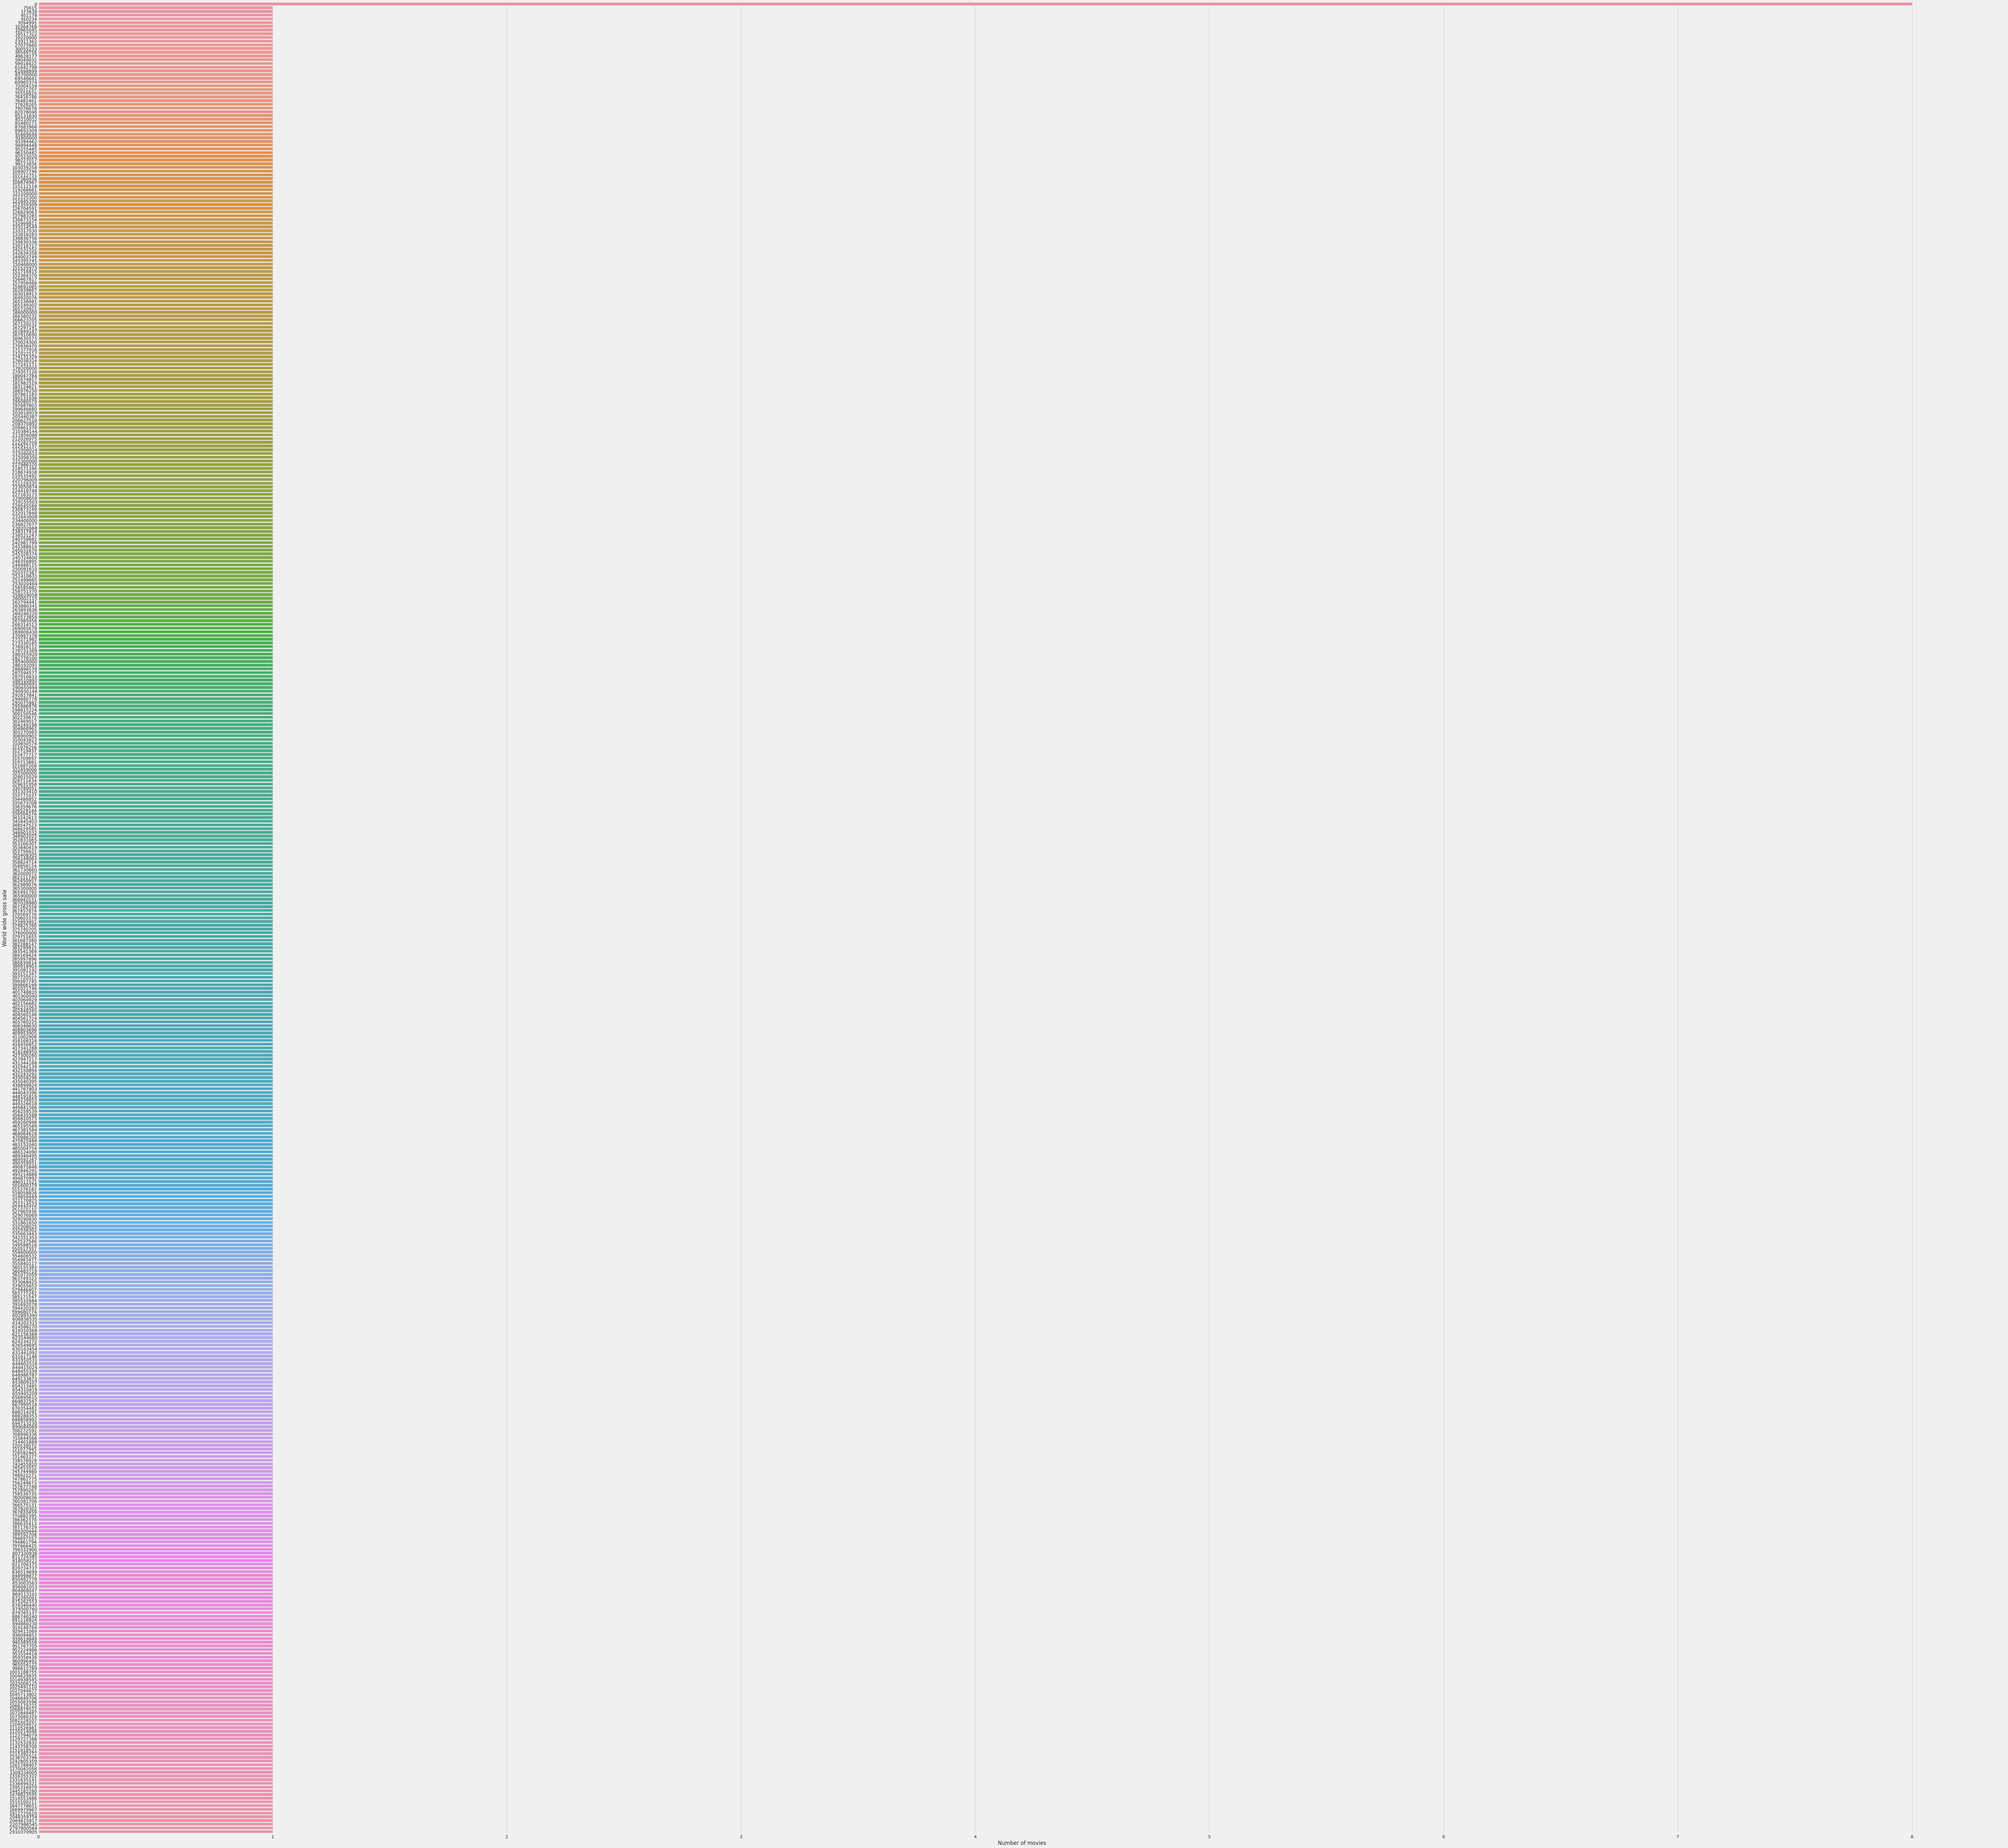

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(100,100))
Runtime_of_Movies_plot = sns.countplot(data=movies,y="worldwide_gross")
Runtime_of_Movies_plot.set_xlabel("Number of movies")
Runtime_of_Movies_plot.set_ylabel("World wide gross sale")
plt.show()

In [ ]:
movies["year"].value_counts()


2016.0    34
2013.0    33
2019.0    30
2010.0    30
2017.0    27
2014.0    27
2012.0    26
2015.0    26
2018.0    24
2011.0    24
2009.0    22
2021.0    21
2004.0    19
2007.0    18
2008.0    18
2005.0    15
2003.0    14
2002.0    12
2001.0    12
2006.0    12
2022.0    12
2000.0     9
2020.0     8
1997.0     7
1999.0     7
1995.0     3
1998.0     3
2023.0     2
1996.0     2
1991.0     1
1994.0     1
Name: year, dtype: int64

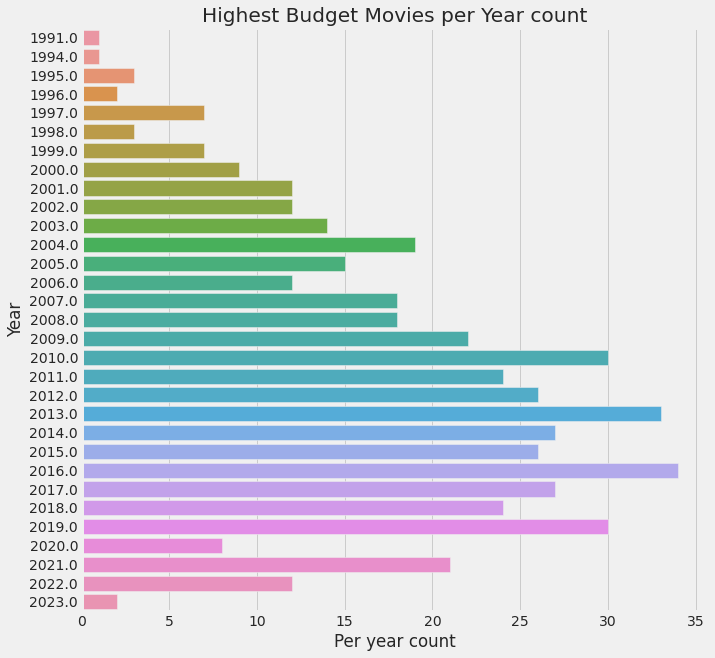

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,10))
plt.title("Highest Budget Movies per Year count")
Production_per_year_plot = sns.countplot(data=movies,y="year")
Production_per_year_plot.set_xlabel("Per year count")
Production_per_year_plot.set_ylabel("Year")
plt.show()

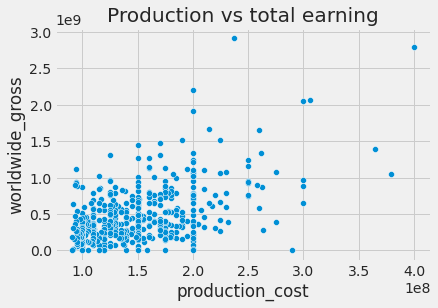

In [ ]:
import seaborn as sb
sb.scatterplot(x  = df['production_cost'],y =df['worldwide_gross'])
plt.title('Production vs total earning')
plt.show()

In [ ]:
X = data.production_cost
X

0      400000000
1      379000000
2      365000000
3      306000000
4      300000000
         ...    
495     92000000
496     92000000
497     92000000
498     91000000
499     91000000
Name: production_cost, Length: 500, dtype: int64

In [ ]:
Y = data.worldwide_gross
Y

0      2797800564
1      1045713802
2      1395316979
3      2064615817
4      2048359754
          ...    
495     304249198
496      23911362
497      18517322
498     187861183
499             0
Name: worldwide_gross, Length: 500, dtype: int64

In [ ]:
X = data['production_cost'].values
Y = data['worldwide_gross'].values

In [ ]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

m = len(X)

numer = 0
denom = 0
for i in range(m):
  numer += (X[i] - mean_x) * (Y[i] - mean_y) 
  denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

print(b1, b0)

4.334965867719542 -178279891.46108


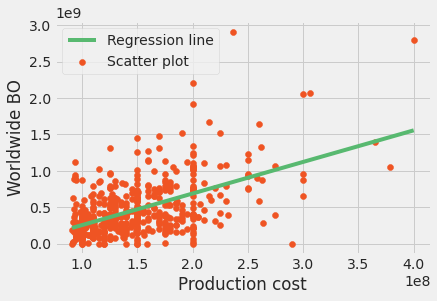

In [ ]:

max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x
plt.plot(x, y, color='#58b970', label='Regression line')
plt.scatter(X, Y, c='#ef5423', label="Scatter plot")

plt.xlabel('Production cost')
plt.ylabel('Worldwide BO')
plt.legend()
plt.show()




In [ ]:
ss_t = 0
ss_r = 0
for i in range(m):
  y_pred = b0 + b1 * x[i]
  ss_t += (Y[i] - mean_y) ** 2
  ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)


-0.7932421096499713


In [ ]:
import statsmodels.api as sm

#spector_data = sm.datasets.spector.load()
#spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)
mod = sm.OLS(x, y)

res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.505e+05
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                        0.00
Time:                        16:26:40   Log-Likelihood:                         -18036.
No. Observations:                1000   AIC:                                  3.607e+04
Df Residuals:                     999   BIC:                                  3.608e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------